# Evology - demo
This notebook presents a sample of simulation results.

In [1]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import math
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

Evology has two simulation modes:
* "Open loop" initialises the simulation on 2012-06-30 and keeps running over time
* "Quarterly resets" reinitialises the simulation at the end of each quarter, so that the next quarter starts with the most recent data on funds and stocks

In [6]:
# Import simulation data

# Simulation run with quarterly resets
data_qr = pd.read_csv(
    "./data/2023_11_14_reset_run_data.csv",
    index_col=0)
data_qr.head(5)

,Date,Generation,WShare_value,WShare_growth,WShare_core,WShare_income,WShare_index,WShare_quant,WShare_flex,WShare_sector,...,Average_ts_quant_1737,Ownership_share_sector_1737,Cap_share_sector_1737,Average_ts_sector_1737,Ownership_share_adaptive_1737,Cap_share_adaptive_1737,Average_ts_adaptive_1737,Adaptive_diversity,Novelty_0,Wealth_fund_0
0,2011-01-01,-1.0,0.104968,0.180689,0.385453,0.044555,0.099062,0.004577,0.115710,0.064987,...,0.000226,0.017221,0.017221,0.000010,0.0,0.0,0.0,0.0,0.0,1.000000e+06
1,2012-06-30,0.0,0.157130,0.183437,0.446912,0.014065,0.024085,0.023406,0.053199,0.097765,...,0.031099,0.431651,0.431651,0.016840,0.0,0.0,0.0,0.0,0.0,1.000944e+06
2,2012-09-30,1.0,0.152705,0.183493,0.464267,0.011383,0.015831,0.019467,0.049314,0.103539,...,0.033122,0.134794,0.134794,0.004754,0.0,0.0,0.0,0.0,0.0,1.001831e+06
3,2012-12-31,2.0,0.140824,0.234836,0.430348,0.017264,0.015324,0.010619,0.048864,0.101920,...,0.011951,0.369682,0.369682,0.001784,0.0,0.0,0.0,0.0,0.0,1.002747e+06
4,2013-03-31,3.0,0.132430,0.240389,0.425534,0.020512,0.015287,0.011991,0.052735,0.101121,...,0.016842,0.456777,0.456777,0.001764,0.0,0.0,0.0,0.0,0.0,1.001697e+06


In [52]:
# Graphical parameters
fontsize_label = 12
fontsize_legend = 12
fontsize_title = 14

## Wealth shares of mutual funds investment styles over time

Investment styles categories are built from grouping various Lipper investment objectives together. This figure describes the relative size of different investment styles among mutual funds during the simulation.

In [36]:
# Define column names, labels and colours

Y_wshares = [
    "WShare_value",
    "WShare_growth",
    "WShare_core",
    "WShare_income",
    "WShare_index",
    "WShare_quant",
    "WShare_flex",
    "WShare_sector"
]

labels_wshares = [
    "Value",
    "Growth",
    "Core",
    "Income",
    "Index",
    "Quantitative",
    "Flexible",
    "Sector"
]

colors_wshares = [
    "blue",
    "red",
    "gold",
    "purple",
    "deepskyblue",
    "pink",
    "orange",
    "limegreen"
]

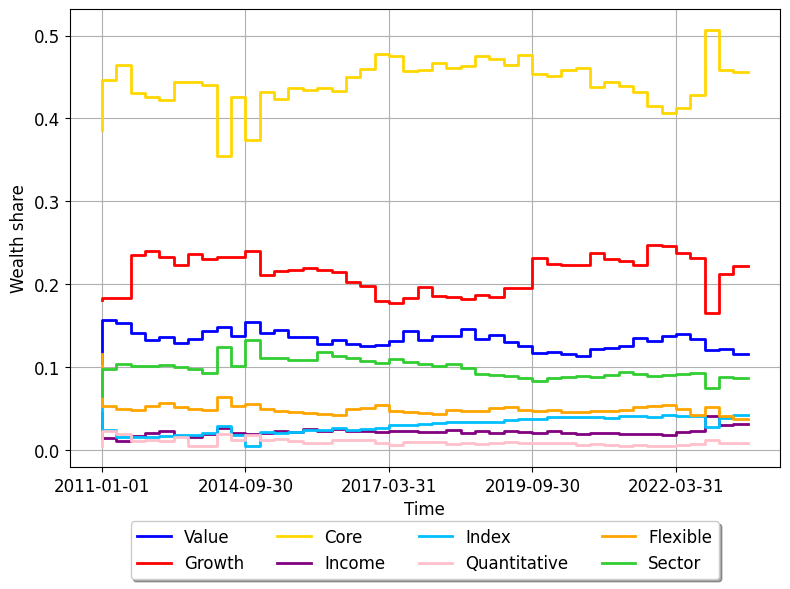

In [39]:
# Show plot

data_qr.plot(x="Date", y=Y_wshares, figsize=(8, 6), drawstyle="steps", color=colors_wshares, lw=2)
plt.xlabel("Time", fontsize=fontsize_label)
plt.ylabel("Wealth share", fontsize=fontsize_label)
plt.xticks(size=fontsize_label)
plt.yticks(size=fontsize_label)
plt.legend()
plt.grid()

plt.legend(labels=labels_wshares, fontsize=fontsize_legend, loc='upper center', bbox_to_anchor=(0.5, -0.1),
        fancybox=True, shadow=True, ncol=4)
plt.tight_layout()
plt.show()

## Mutual fund investment style ownership of a single stock over time 

With the same approach, we can decompose each stocks' ownership between the different investment styles.
* Stock #126 (AAPL) shows in the simulation an alternance between the Core and Growth styles, with a progressive growth in the index fund. Technoogy sector funds occasionally take some ownership in the stock.
* Stock #1488 (TSLA) maintains a very high share of growth investors; index gradually accumulates ownerhsip and flexible mutual funds gradually decrease their activity in the stock.
* Stock #82 (AMZN) maintains a high share of growth investors, with occasional value swings and increasing index presence

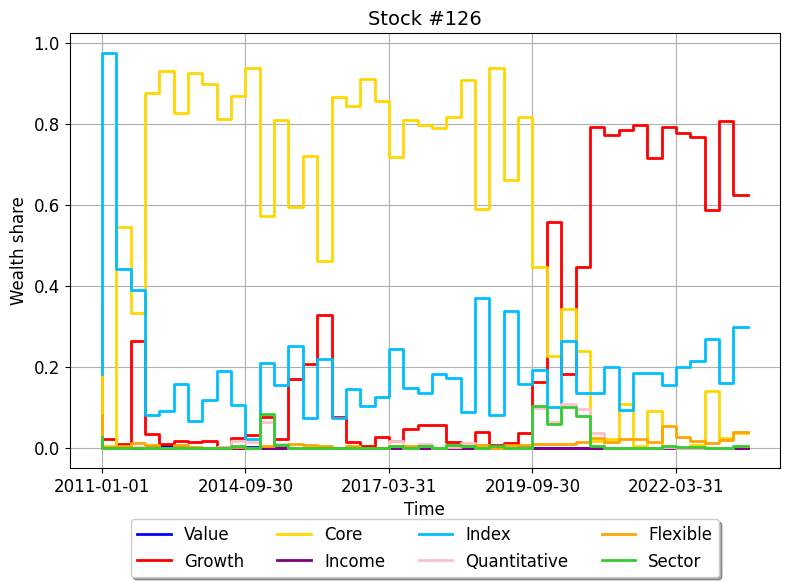

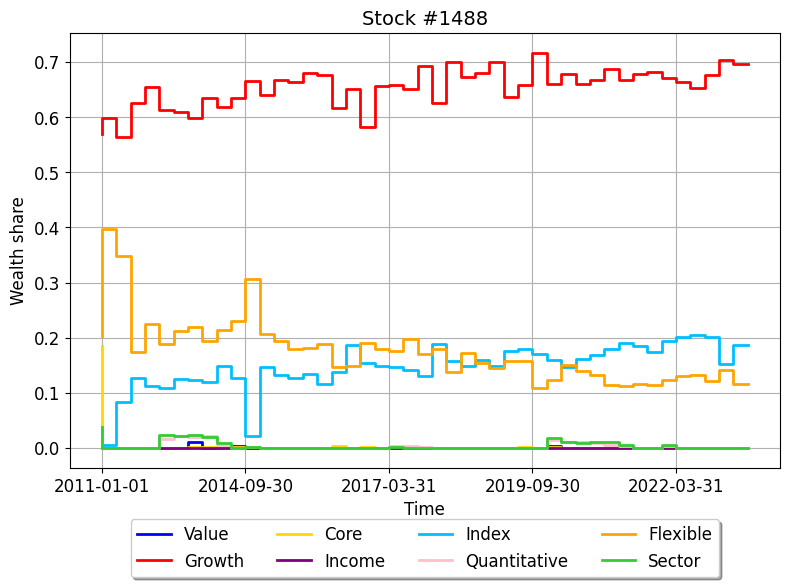

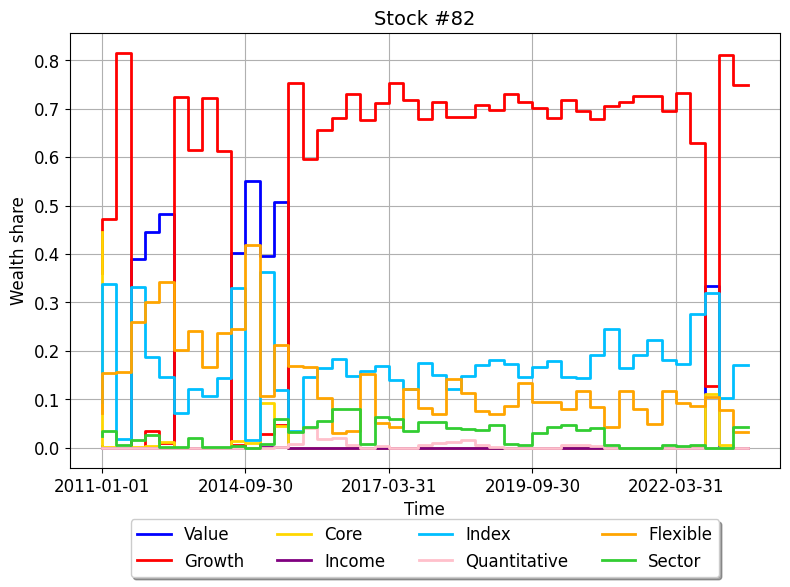

In [60]:
def set_y_wshares_stock(stock_index):
    Y_wshares_stock = [
        "Cap_share_value_{}".format(stock_index),
        "Cap_share_growth_{}".format(stock_index),
        "Cap_share_core_{}".format(stock_index),
        "Cap_share_income_{}".format(stock_index),
        "Cap_share_index_{}".format(stock_index),
        "Cap_share_quant_{}".format(stock_index),
        "Cap_share_flex_{}".format(stock_index),
        "Cap_share_sector_{}".format(stock_index),
    ]
    return Y_wshares_stock

def show_ownership_plot(stock_index):
    # Set relevant columns 
    Y_wshares_stock = set_y_wshares_stock(stock_index)

    # Generate plot
    data_qr.plot(x="Date", y=Y_wshares_stock, figsize=(8, 6), drawstyle="steps", color=colors_wshares, lw=2)
    plt.xlabel("Time", fontsize=fontsize_label)
    plt.ylabel("Wealth share", fontsize=fontsize_label)
    plt.xticks(size=fontsize_label)
    plt.yticks(size=fontsize_label)
    plt.legend()
    plt.grid()
    plt.title('Stock #{}'.format(stock_index), fontsize=fontsize_title)

    plt.legend(labels=labels_wshares, fontsize=fontsize_legend, loc='upper center', bbox_to_anchor=(0.5, -0.1),
            fancybox=True, shadow=True, ncol=4)
    plt.tight_layout()
    plt.show()

show_ownership_plot(126)
show_ownership_plot(1488)
show_ownership_plot(82)